In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder


In [2]:
df = pd.read_csv('framingham (1).csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


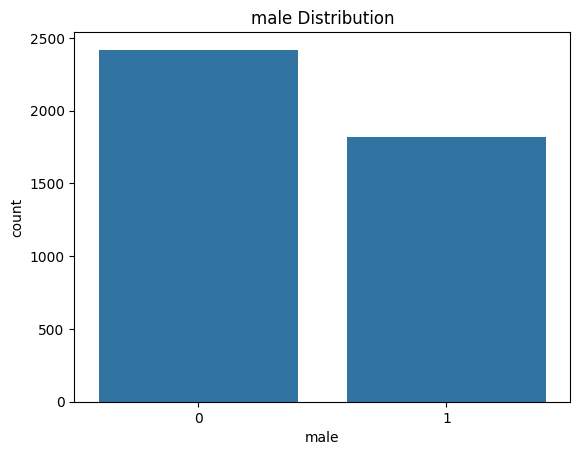

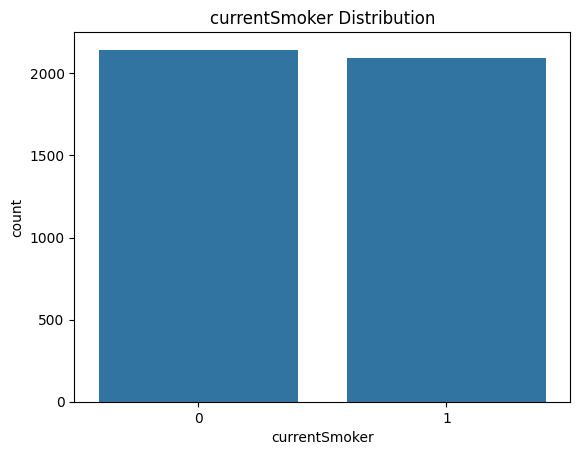

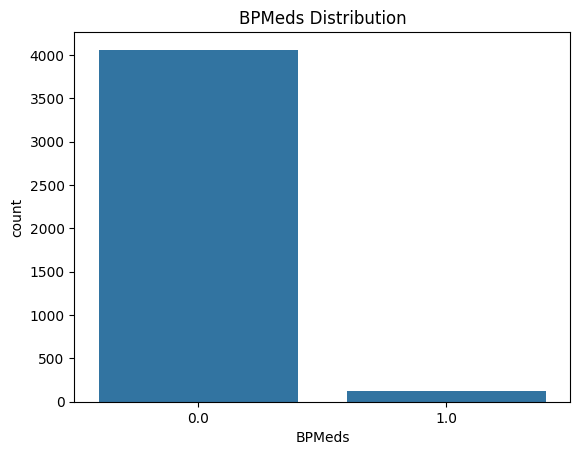

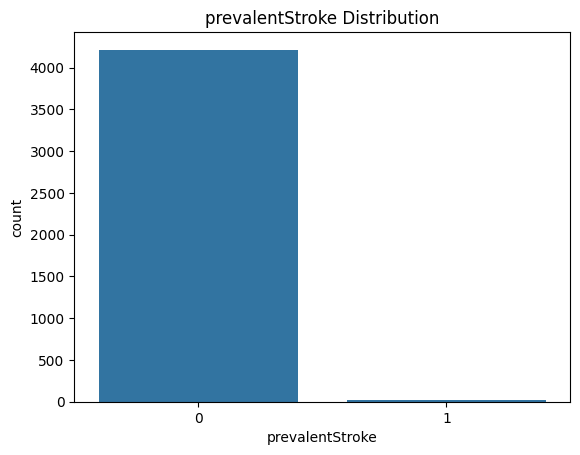

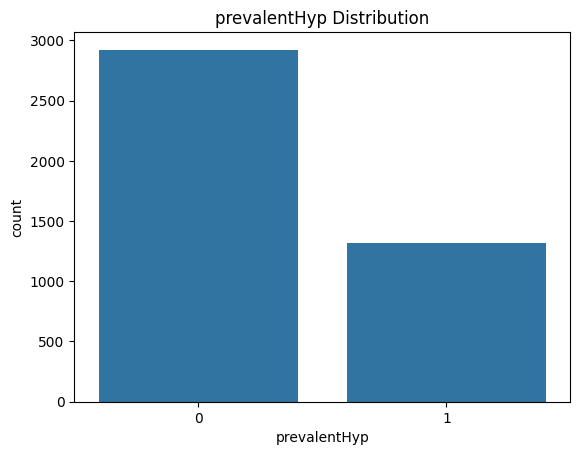

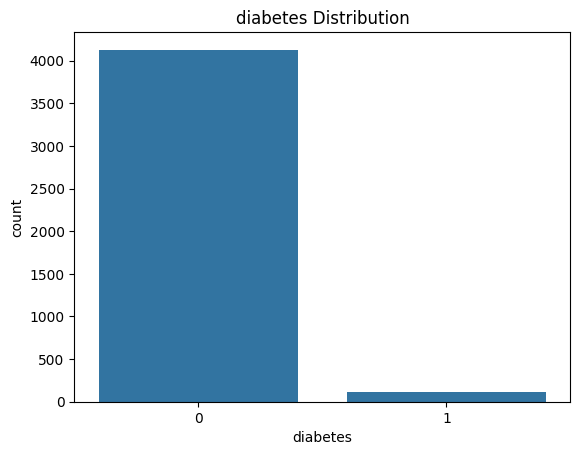

In [9]:
cat_features = ["male", "currentSmoker", "BPMeds", "prevalentStroke", "prevalentHyp", "diabetes"]
for col in cat_features:
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution")
    plt.show()

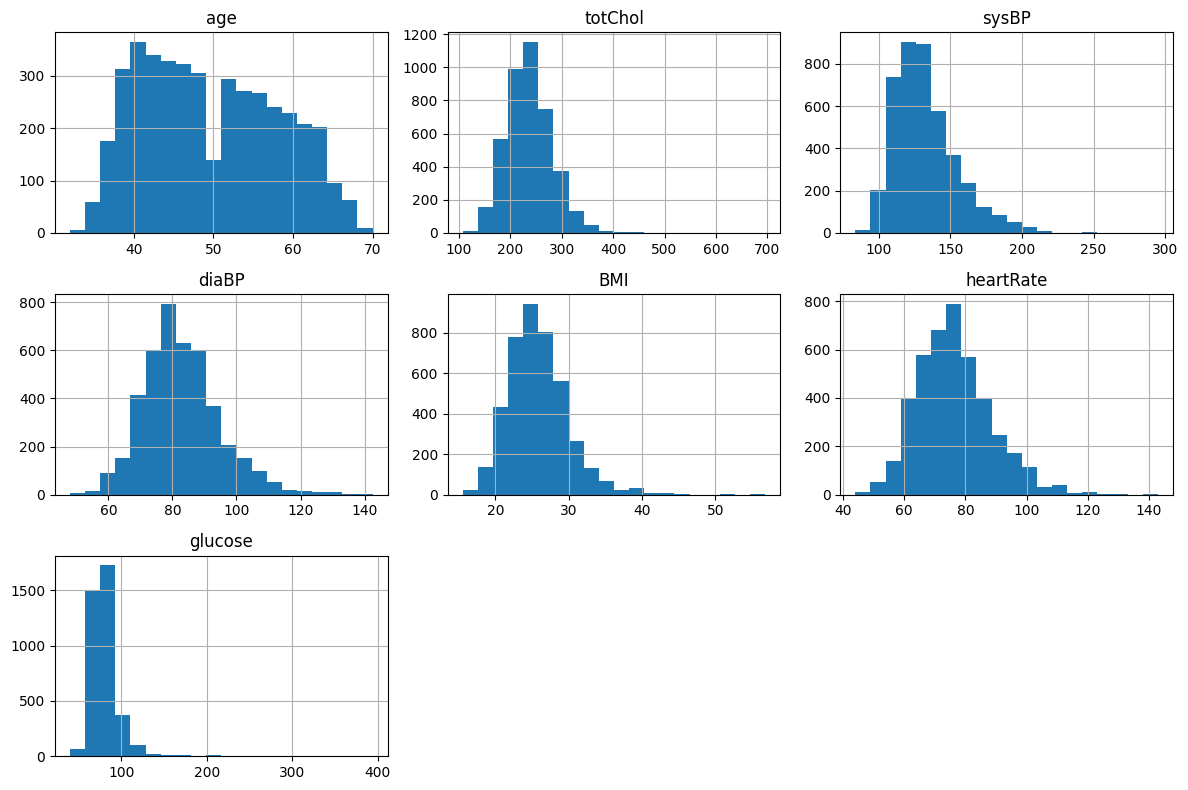

In [10]:
num_features = ["age", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]
df[num_features].hist(figsize=(12, 8), bins=20)
plt.tight_layout()
plt.show()

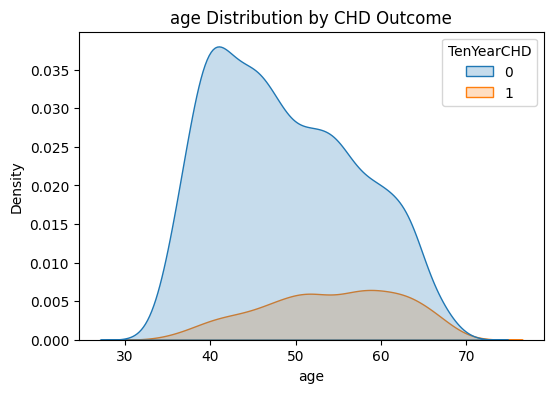

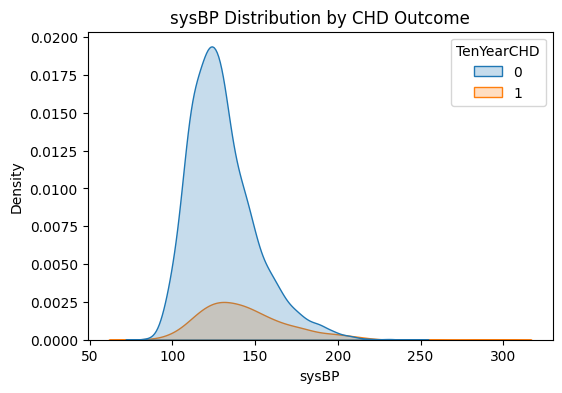

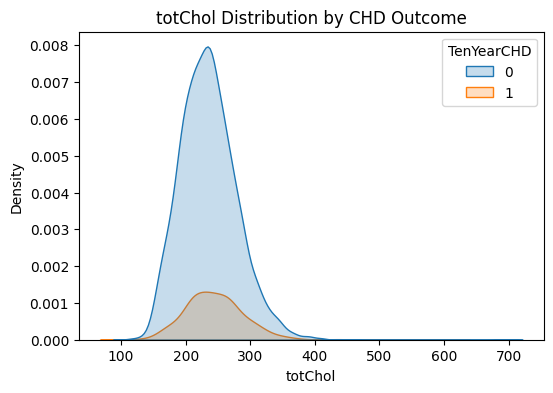

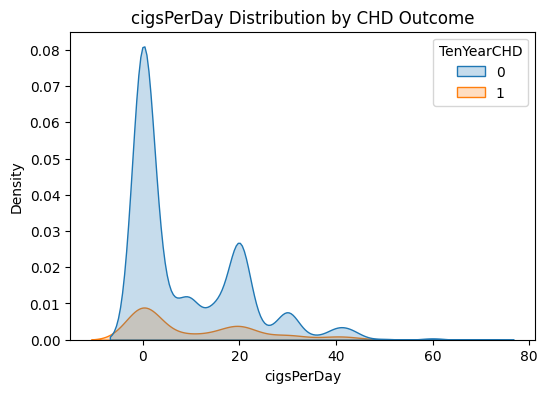

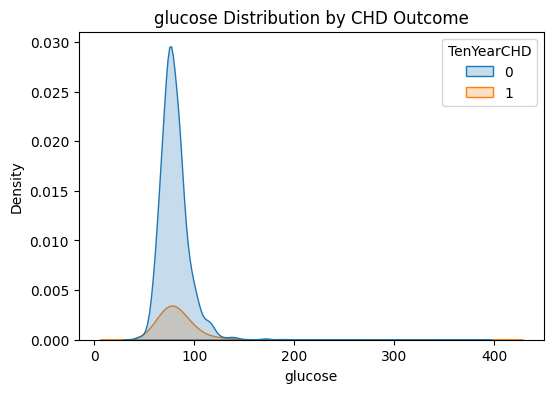

In [4]:
num_cols = ["age", "sysBP", "totChol", "cigsPerDay", "glucose"]
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(x=col, hue="TenYearCHD", data=df, fill=True)
    plt.title(f"{col} Distribution by CHD Outcome")
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5328\133281945.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CHD_10yr', data=df, palette='pastel')


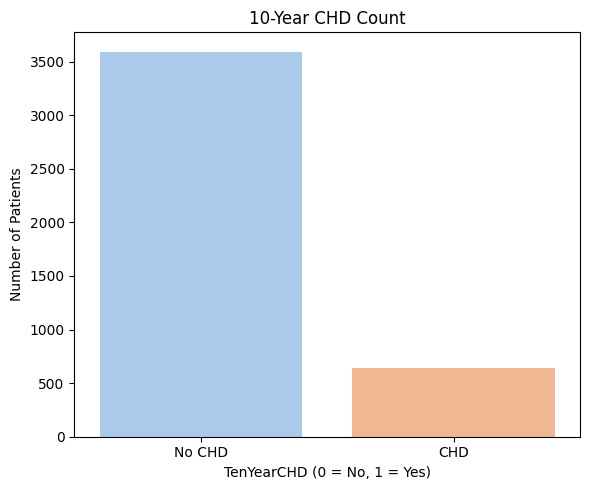

In [5]:

df.rename(columns={'TenYearCHD': 'CHD_10yr'}, inplace=True)

# Plot count of CHD occurrences
plt.figure(figsize=(6,5))
sns.countplot(x='CHD_10yr', data=df, palette='pastel')
plt.title('10-Year CHD Count')
plt.xlabel('TenYearCHD (0 = No, 1 = Yes)')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['No CHD', 'CHD'])
plt.tight_layout()
plt.show()

In [17]:
def detect_outliers(df):
    numeric = df.select_dtypes(include='number')
    ## compute our q1, q3 and iqr
    Q1 = numeric.quantile(0.25)
    Q3 = numeric.quantile(0.75)
    IQR = Q3 - Q1
    ## define our lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_ret = (numeric < lower_bound) | (numeric > upper_bound)
    return outlier_ret

In [18]:
outliers = detect_outliers(df)
outliers.sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          12
BPMeds             124
prevalentStroke     25
prevalentHyp         0
diabetes           109
totChol             56
sysBP              126
diaBP               81
BMI                 97
heartRate           76
glucose            188
CHD_10yr           644
dtype: int64

In [19]:
rows_with_outliers = outliers.any(axis=1)

In [20]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD_10yr
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [12]:
df_cleaned = df[rows_with_outliers == False]
df_cleaned

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD_10yr
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [22]:
scale = StandardScaler()

feat = ['age', 'cigsPerDay', 'totChol']

df[feat] = scale.fit_transform(df[feat])

In [23]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD_10yr
0,1,-1.234951,4.0,0,-0.755376,0.0,0,0,0,-0.935776,106.0,70.0,26.97,80.0,77.0,0
1,0,-0.418257,2.0,0,-0.755376,0.0,0,0,0,0.297822,121.0,81.0,28.73,95.0,76.0,0
2,1,-0.184916,1.0,1,0.922662,0.0,0,0,0,0.185677,127.5,80.0,25.34,75.0,70.0,0
3,0,1.331800,3.0,1,1.761681,0.0,0,1,0,-0.262904,150.0,95.0,28.58,65.0,103.0,1
4,0,-0.418257,3.0,1,1.174368,0.0,0,0,0,1.082840,130.0,84.0,23.10,85.0,85.0,0


In [24]:
df = df.fillna(df.mean(numeric_only=True))

In [25]:

df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
CHD_10yr           0
dtype: int64

In [26]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD_10yr
count,4238.000000,4.238000e+03,4238.000000,4238.000000,4.238000e+03,4238.00000,4238.000000,4238.000000,4238.000000,4.238000e+03,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,1.307747e-16,1.978950,0.494101,-8.382996e-17,0.02963,0.005899,0.310524,0.025720,3.177155e-16,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,1.000118e+00,1.007075,0.500024,9.966903e-01,0.16852,0.076587,0.462763,0.158316,9.942008e-01,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,-2.051644e+00,1.000000,0.000000,-7.553765e-01,0.00000,0.000000,0.000000,0.000000,-2.909534e+00,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,-8.849392e-01,1.000000,0.000000,-7.553765e-01,0.00000,0.000000,0.000000,0.000000,-6.890564e-01,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,-6.824590e-02,2.000000,0.000000,-7.553765e-01,0.00000,0.000000,0.000000,0.000000,-6.104261e-02,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,7.484475e-01,3.000000,1.000000,9.226620e-01,0.00000,0.000000,1.000000,0.000000,5.669711e-01,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,2.381834e+00,4.000000,1.000000,5.117758e+00,1.00000,1.000000,1.000000,1.000000,1.030118e+01,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [27]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD_10yr
0,1,-1.234951,4.0,0,-0.755376,0.0,0,0,0,-0.935776,106.0,70.0,26.97,80.0,77.0,0
1,0,-0.418257,2.0,0,-0.755376,0.0,0,0,0,0.297822,121.0,81.0,28.73,95.0,76.0,0
2,1,-0.184916,1.0,1,0.922662,0.0,0,0,0,0.185677,127.5,80.0,25.34,75.0,70.0,0
3,0,1.331800,3.0,1,1.761681,0.0,0,1,0,-0.262904,150.0,95.0,28.58,65.0,103.0,1
4,0,-0.418257,3.0,1,1.174368,0.0,0,0,0,1.082840,130.0,84.0,23.10,85.0,85.0,0


In [28]:
## get the dependednt and independent variable
X = df.iloc[:, [1,4,9]]
y = df.iloc[:, 15]

In [29]:
X

,age,cigsPerDay,totChol
0,-1.234951,-0.755376,-0.935776
1,-0.418257,-0.755376,0.297822
2,-0.184916,0.922662,0.185677
3,1.331800,1.761681,-0.262904
4,-0.418257,1.174368,1.082840
...,...,...,...
4233,0.048425,-0.671475,1.710853
4234,0.165095,2.852406,-0.666627
4235,-0.184916,0.922662,0.252964
4236,-0.651598,0.503152,-0.599340


In [30]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: CHD_10yr, Length: 4238, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=32)

In [ ]:
X_train

,age,cigsPerDay,totChol
1269,1.098459,-0.000259,-1.182496
477,-0.418257,0.503152,0.230535
414,0.631777,-0.503671,1.935144
2565,0.165095,-0.755376,-0.218046
3171,-1.001610,0.922662,-0.801202
...,...,...,...
4030,-1.818303,-0.755376,-0.913347
2940,-1.001610,0.922662,-0.442337
1334,-0.651598,0.922662,-0.509624
1579,1.331800,0.503152,-0.733914


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_test

array([[-0.87392484,  1.74731212,  0.07889545],
       [ 0.17639608,  0.91241988,  0.07889545],
       [ 0.99331235, -0.00570373, -0.03346593],
       ...,
       [ 0.40980073,  0.49497375, -0.25818868],
       [-0.40711554,  0.91241988,  0.73059143],
       [ 1.46012164,  0.91241988,  2.7306239 ]], shape=(848, 3))

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
y_pred_log_reg = log_reg.predict(X_test)

In [ ]:
pd.DataFrame({'Heartdisease': y_test, 'Heartdisease_Predicted': y_pred_log_reg})

,Heartdisease,Heartdisease_Predicted
4068,1,0
390,0,0
3309,0,0
1476,1,0
894,1,0
...,...,...
603,1,0
2351,0,0
183,0,0
515,0,0


In [ ]:
metrics.accuracy_score(y_test, y_pred_log_reg)

0.8502358490566038

In [ ]:
df['TenYearCHD'].value_counts()

TenYearCHD
0    3594
1     644
Name: count, dtype: int64

In [ ]:
confusion_matrix(y_test, y_pred_log_reg)

array([[720,   1],
       [126,   1]])